# Preliminaries

## Load

In [5]:
%matplotlib notebook

In [6]:
import numpy as np
import sklearn as skl
from sklearn import datasets

In [57]:
from skimage import color
from colorsys import rgb_to_hsv

In [ ]:
import sys
sys.path.append('/home/andy/Documents/Research/pnri/Helpers/')

import importlib
pcl = importlib.import_module('protoclust')
cplt = importlib.import_module('colonyplotting')

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Reload 

In [77]:
pcl = importlib.reload(pcl)
cplt = importlib.reload(cplt)

## Utilities

In [8]:
def labelXYZ(ax, xlabel, ylabel, zlabel=None, params={}):
    ax.set_xlabel(xlabel, **params)
    ax.set_ylabel(ylabel, **params)
    if zlabel:
        ax.set_zlabel(zlabel, **params)
    return ax

## Data
Choose one: Iris or Faces

In [9]:
# iris = skl.datasets.load_iris()
# X = iris.data # 150 samples by (petal length, petal width, sepal length, sepal width)
# n,d = X.shape
# Y = iris.target # 3 possible species

In [10]:
faces = skl.datasets.fetch_olivetti_faces()
X = faces.data
n,d = X.shape # d = 64x64
Y = faces.target

In [11]:
print(n)

400


# Analysis

## Inspect SVD

In [12]:
U,S,Vt = np.linalg.svd(X - np.mean(X, axis=0))

<IPython.core.display.Javascript object>


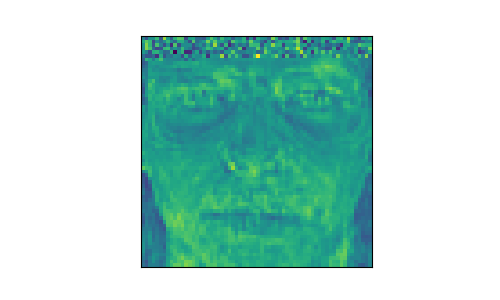

In [74]:
fig, ax = plt.subplots(1, figsize=[5,3])
ax.imshow(Vt[:,0].reshape(64,64))
cplt.clean_ax(ax)

<IPython.core.display.Javascript object>


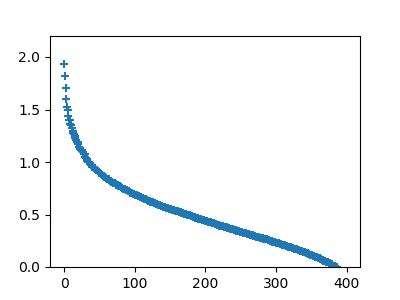

(0, 2.2)

In [62]:
fig,ax = plt.subplots(1, figsize=[4,3])
ax.scatter(list(range(len(S))), np.log10(S), marker='+')
ax.set_ylim([0,2.2])

<IPython.core.display.Javascript object>


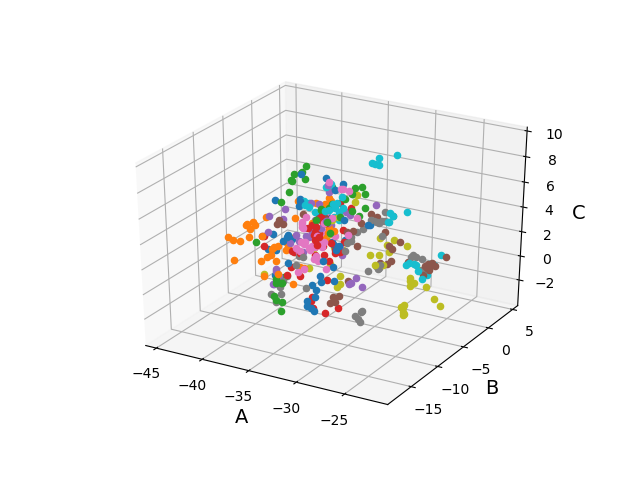

In [14]:
fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')
pcX = X@Vt.T[:,:3]
colors, cnorm = [mpl.cm.get_cmap('tab10'), np.max(Y)]
for i,j,k,c in zip(pcX[:,0], pcX[:,1], pcX[:,2],Y):
    ax.scatter(i,j,k,color=colors(c/cnorm))
labelXYZ(ax, 'A','B','C', {'fontsize': 14});

## An example of protoclust

In [78]:
clustering, clustering_centers, clustering_distances = pcl.protoclust(X)

<IPython.core.display.Javascript object>


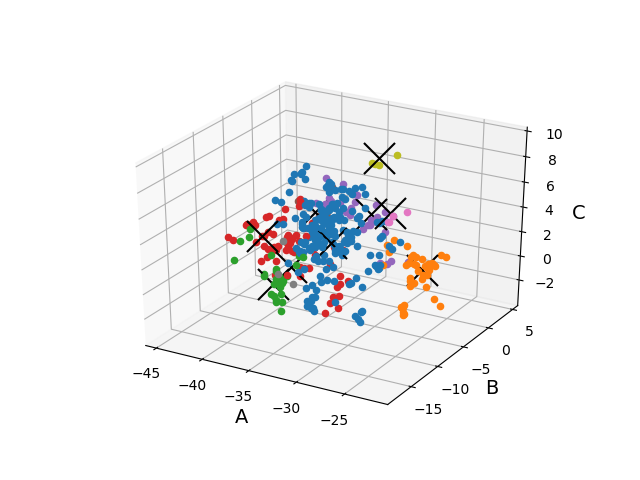

In [60]:
k = 9

kclust = clustering[-k]
kclust_center = clustering_centers[-k]

colors, cnorm = [mpl.cm.get_cmap('tab10'), k]

fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')
pcX = X@Vt.T[:,:3]
for index, row in enumerate(pcX):
    c='gray'
    i,j,k = row
    for a, aclust in enumerate(kclust):
        if index in aclust:
            c=colors(a/cnorm)
    
    if index in kclust_center:
        ax.scatter(i,j,k,color='k', s=500, marker='x')
    else:
        ax.scatter(i,j,k,color=c)
    
labelXYZ(ax, 'A','B','C', {'fontsize': 14});

<IPython.core.display.Javascript object>


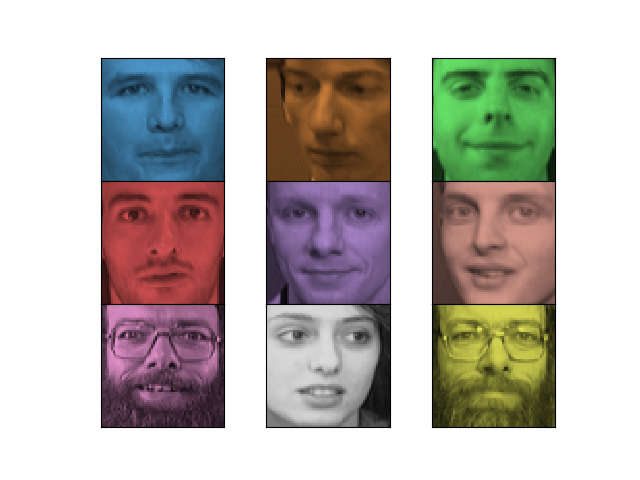

In [61]:
fig, ax = plt.subplots(3,3)
fig.subplots_adjust(wspace=0, hspace=0)
for i,row in enumerate(kclust_center):
    im = color.gray2rgb(X[row].reshape(64,64))
    c_hsv = rgb_to_hsv(*colors(i/cnorm)[:-1])
    ax.flatten()[i].imshow(cplt.colorize(im, c_hsv[0], .75*c_hsv[1]))
    cplt.clean_ax(ax.flatten()[i])

<IPython.core.display.Javascript object>


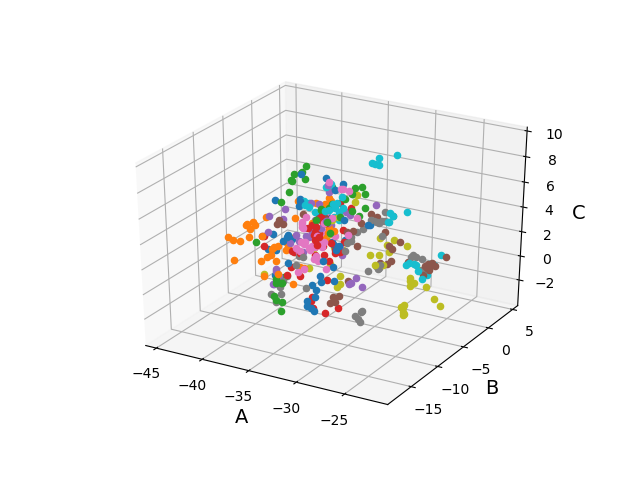

In [484]:
fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')
pcX = X@Vt.T[:,:3]
colors, cnorm = [mpl.cm.get_cmap('tab10'), np.max(Y)]
for i,j,k,c in zip(pcX[:,0], pcX[:,1], pcX[:,2],Y):
    ax.scatter(i,j,k,color=colors(c/cnorm))
labelXYZ(ax, 'A','B','C', {'fontsize': 14});